In [2]:
library(dplyr)
library(Seurat)
library(patchwork)
library(ggplot2)

In [3]:
p <- readRDS('./plasma_cluster.rds')

In [4]:
p

An object of class Seurat 
24450 features across 15353 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

# Perform an integrated analysis

In [5]:
# specify that we will perform downstream analysis on the corrected data note that the original
# unmodified data still resides in the 'RNA' assay
DefaultAssay(p) <- "integrated"

# Run the standard workflow for visualization and clustering
p <- ScaleData(p, verbose = FALSE)
p <- RunPCA(p, npcs = 30, verbose = FALSE)
p <- RunUMAP(p, reduction = "pca", dims = 1:27)
p <- FindNeighbors(p, reduction = "pca", dims = 1:27)
p <- FindClusters(p, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:48:53 UMAP embedding parameters a = 0.9922 b = 1.112

14:48:53 Read 15353 rows and found 27 numeric columns

14:48:53 Using Annoy for neighbor search, n_neighbors = 30

14:48:53 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:48:55 Writing NN index file to temp file /tmp/RtmpyBBv9g/file1a3e5d3ee782

14:48:55 Searching Annoy index using 1 thread, search_k = 3000

14:49:00 Annoy recall = 100%

14:49:00 Commencing smooth kNN distance calibration using 1 thread

14:49:01 Initializing fr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15353
Number of edges: 588364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8805
Number of communities: 14
Elapsed time: 2 seconds


1 singletons identified. 13 final clusters.



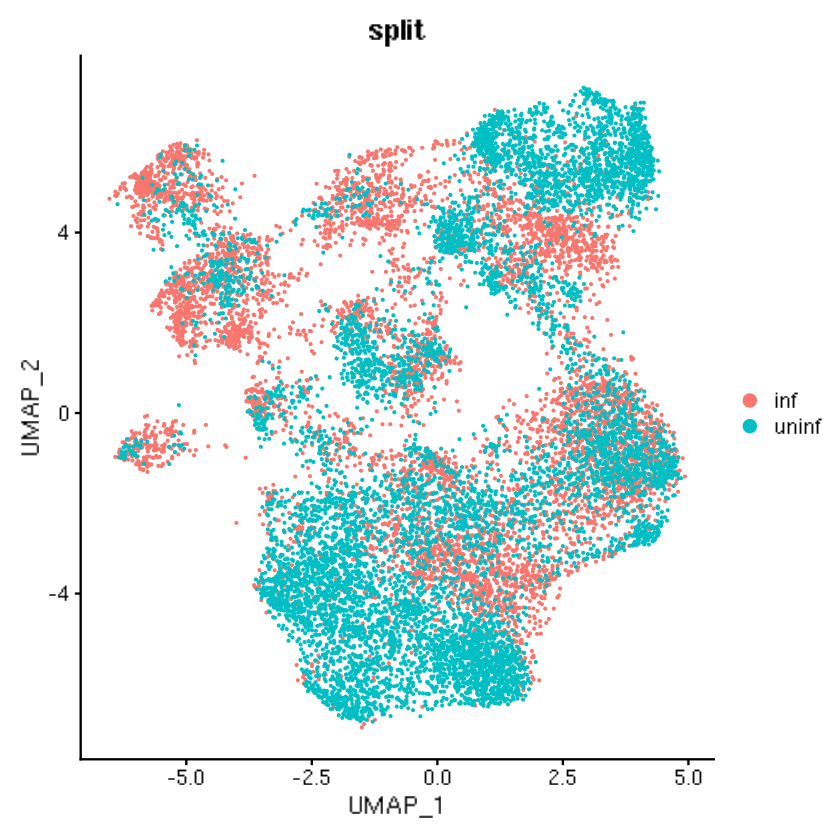

In [6]:
# Visualization
p1 <- DimPlot(p, reduction = "umap", group.by = "split")
p2 <- DimPlot(p, reduction = "umap", label = TRUE, repel = TRUE)
p1

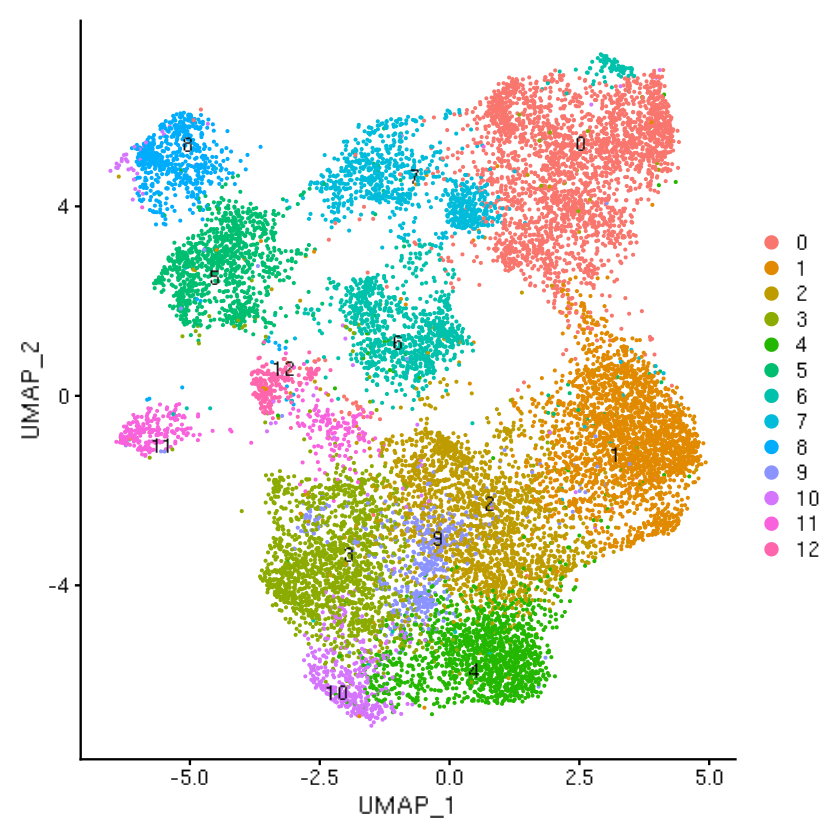

In [7]:
p2

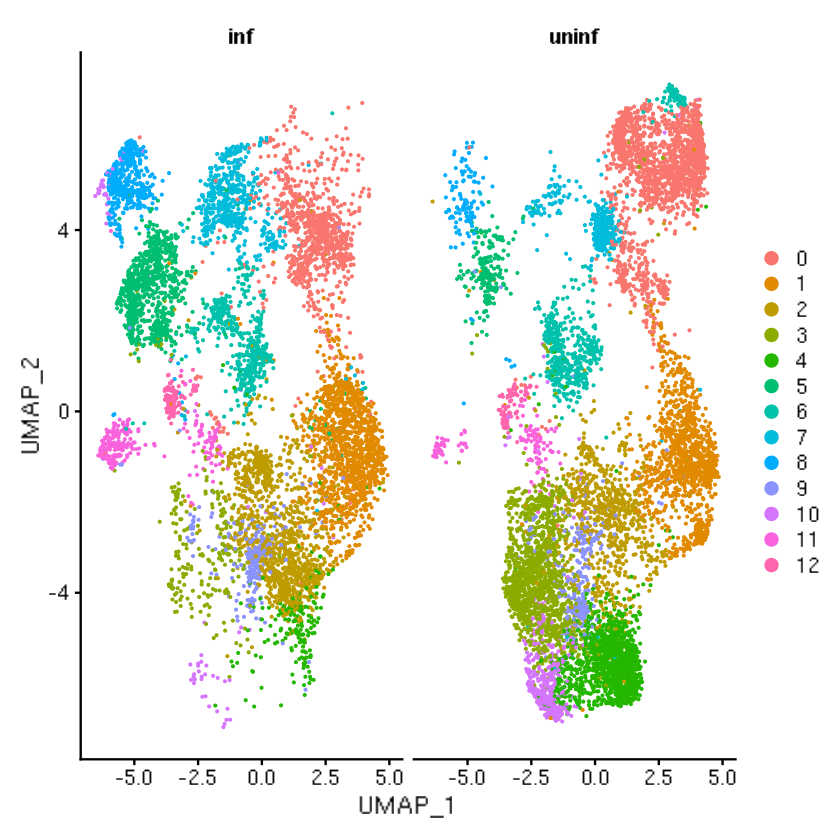

In [8]:
DimPlot(p, reduction = "umap", split.by = "split")

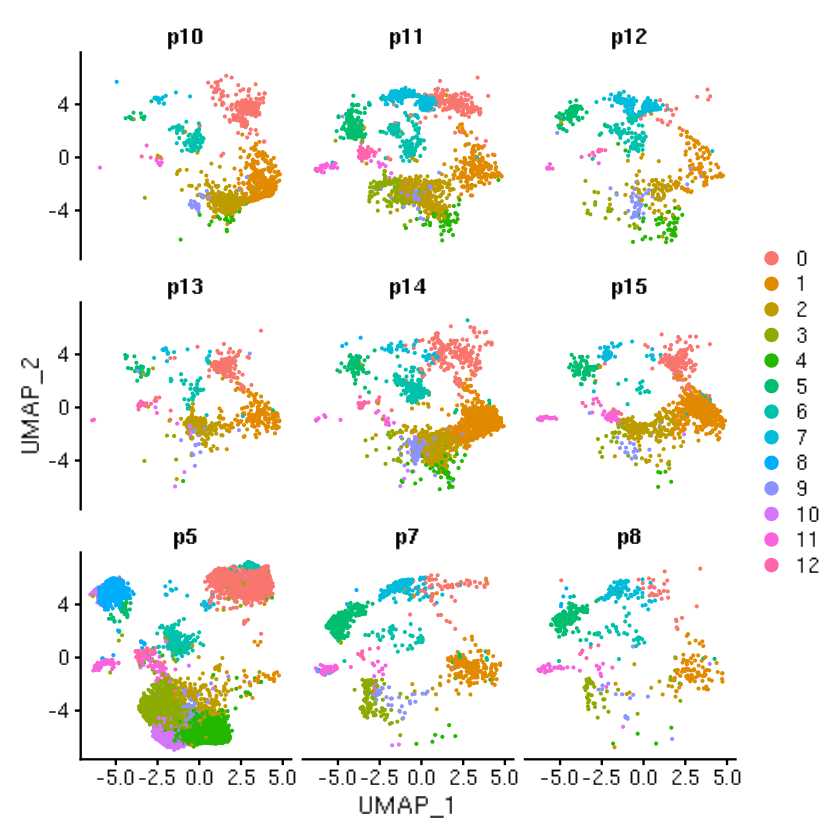

In [9]:
DimPlot(p, reduction = "umap", split.by = "patient", ncol = 3)

# Naming clusters with cell type markers

In [10]:
Plasma <- c('JCHAIN', 'MZB1', 'SSR4')
IgA <- c('IGHA2')
IgM <- c('IGHM')
IgG <- c('IGHG1', 'IGHG3', 'IGHGP', 'IGHG4', 'IGHG2')

In [ ]:
for (i in Plasma) {
    print(FeaturePlot(p, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in IgA) {
    print(FeaturePlot(p, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in IgM) {
    print(FeaturePlot(p, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in IgG) {
    print(FeaturePlot(p, features = i, min.cutoff = "q9"))
}

## Representative markers of each cluster

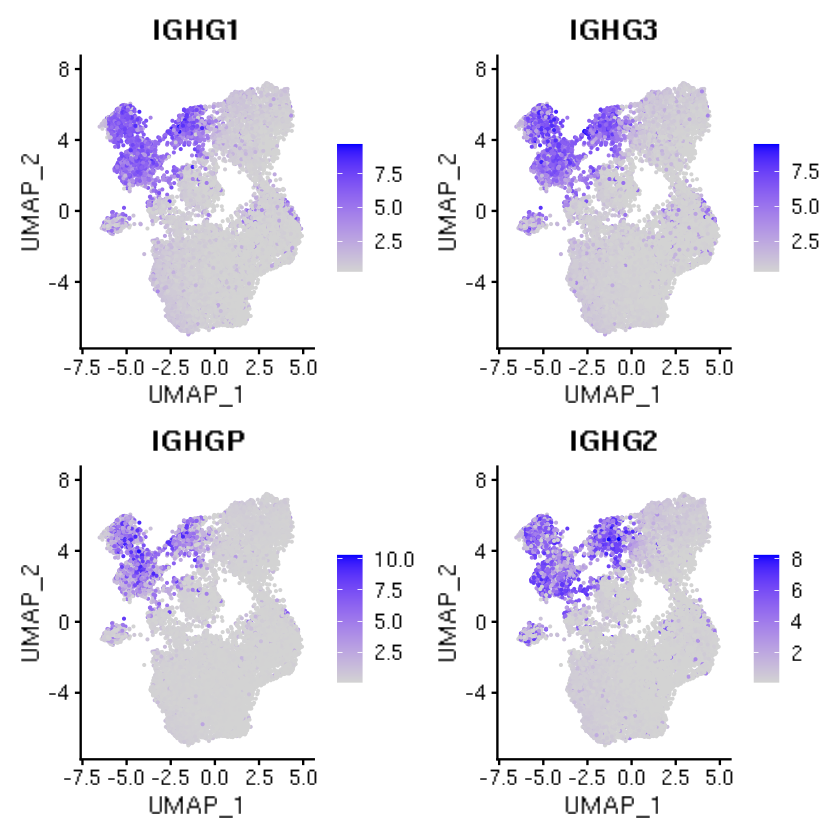

In [11]:
#IgG
FeaturePlot(p, features = c('IGHG1', 'IGHG3', 'IGHGP', 'IGHG2'), min.cutoff = "q9")

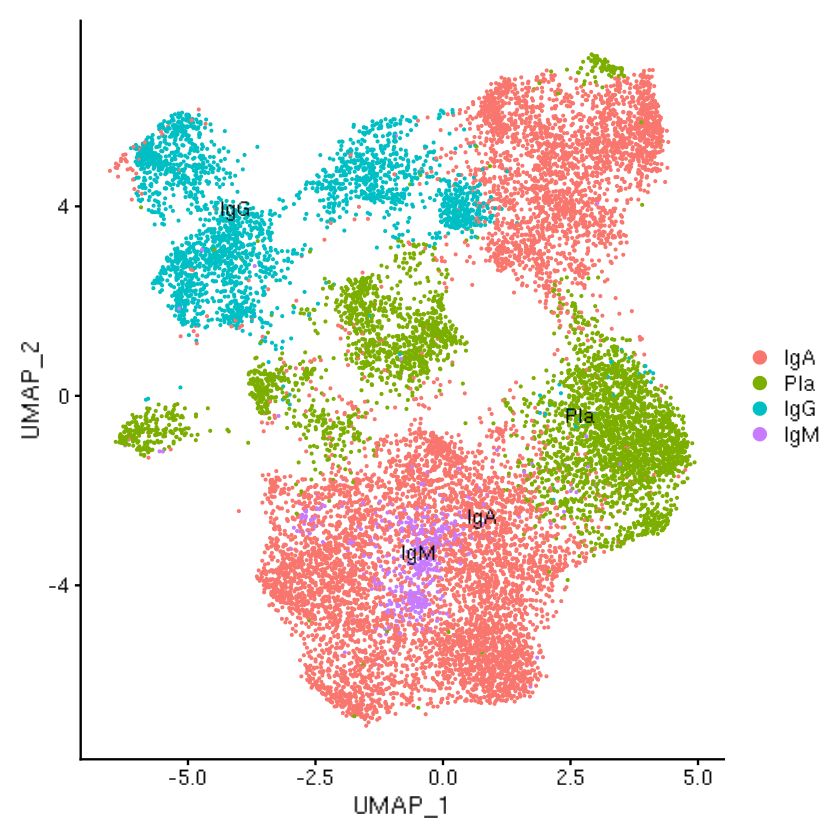

In [12]:
p <- RenameIdents(p, `0` = "IgA", `1` = "Pla", `2` = "IgA", `3` = "IgA", `4` = "IgA", `5` = "IgG", `6` = "Pla", 
                   `7` = "IgG", `8` = 'IgG', `9` = "IgM", `10` = "IgA", `11` = "Pla", `12` = "Pla")
DimPlot(p, label = TRUE)

# Comparison of distributions of clusters

In [13]:
p$celltype <- Idents(p)
head(p@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ep,percent.he,split,patient,integrated_snn_res.1.1,seurat_clusters,celltype,integrated_snn_res.0.5
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
inf_GSE134809_69_AAACTTGATCACCC-1,GSE134809_69,6329,863,0.6320114,0,0.00000000,inf,p5,0,10,IgA,10
inf_GSE134809_69_AAAGACGAATCACG-1,GSE134809_69,10293,2203,1.5350238,0,0.00000000,inf,p5,24,11,Pla,11
inf_GSE134809_69_AAAGATCTTATCGG-1,GSE134809_69,15479,918,0.4393049,0,0.00000000,inf,p5,13,8,IgG,8
inf_GSE134809_69_AAAGCAGATTGGCA-1,GSE134809_69,5465,1231,1.9030192,0,0.01829826,inf,p5,24,11,Pla,11
inf_GSE134809_69_AAAGTTTGATGTGC-1,GSE134809_69,3810,456,1.0761155,0,0.00000000,inf,p5,0,6,Pla,6


### inf vs uninf

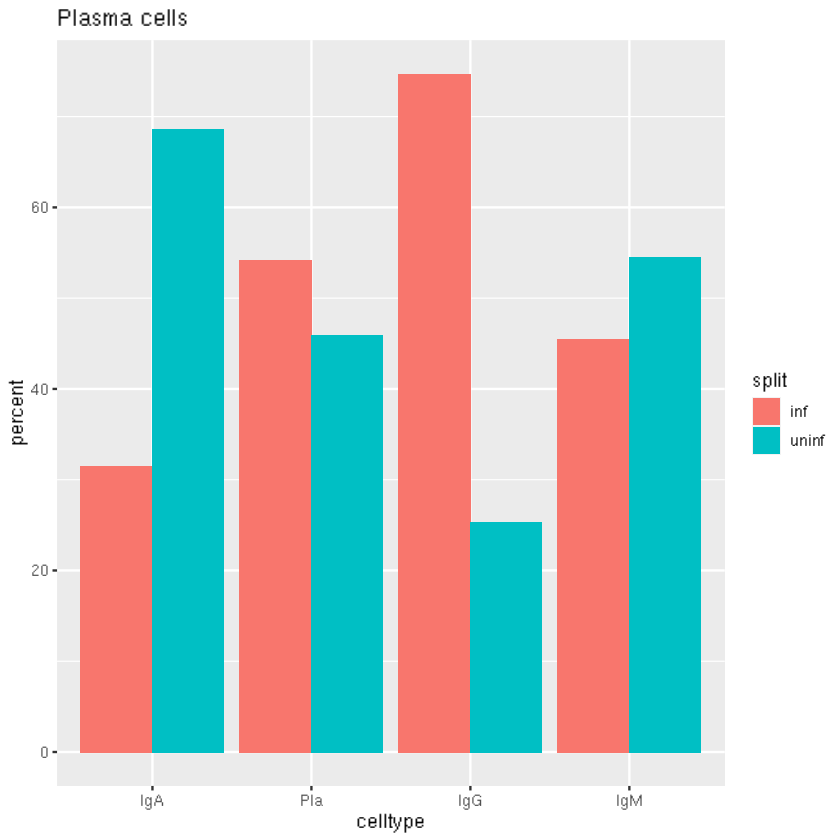

In [14]:
p@meta.data %>%
  group_by(celltype, split) %>%
  count() %>%
  group_by(celltype) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup() %>%
  ggplot(aes(x=celltype, y=percent, fill=split)) +
  geom_col(position = 'dodge') +
  ggtitle("Plasma cells")

### comparison between inf and uninf tissues by patient

In [15]:
a <- p@meta.data %>%
  filter(split == 'inf') %>%
  group_by(patient, split, celltype) %>%
  count() %>%
  group_by(patient) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup()
b <- p@meta.data %>%
  filter(split == 'uninf') %>%
  group_by(patient, split, celltype) %>%
  count() %>%
  group_by(patient) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup()
#c <- rbind(a,b)

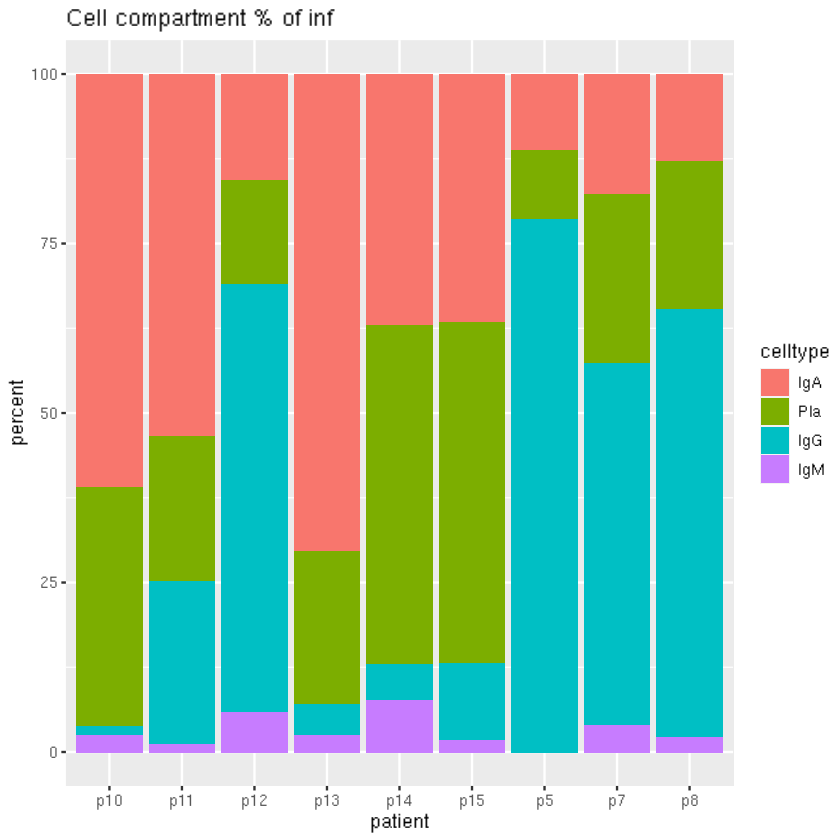

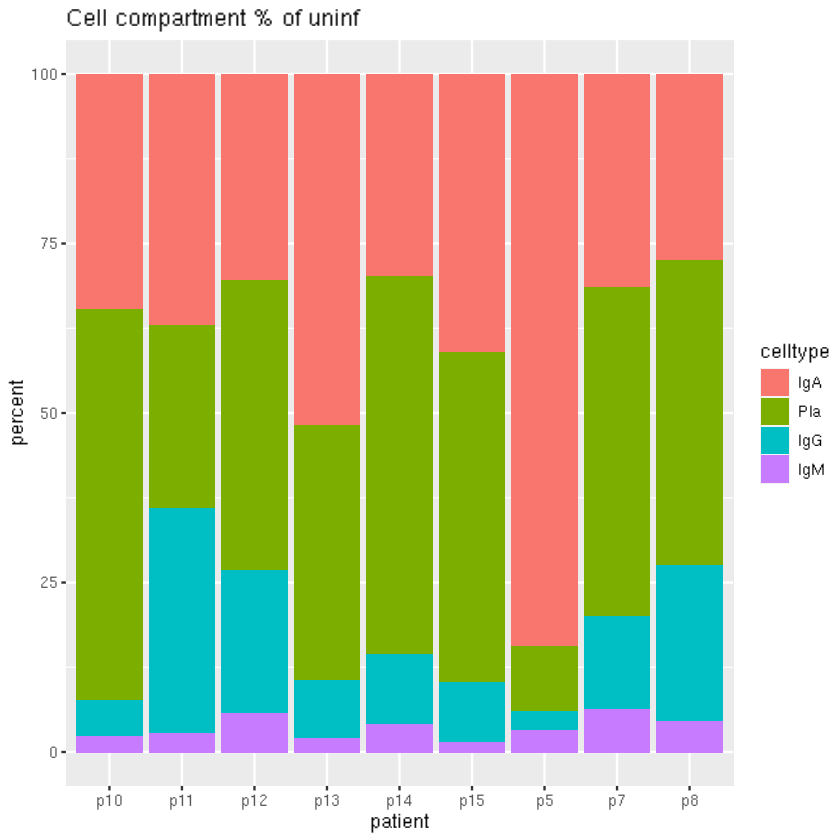

In [16]:
ggplot(a, aes(x=patient,y=percent, fill=celltype)) + geom_col() + ggtitle("Cell compartment % of inf")
ggplot(b, aes(x=patient,y=percent, fill=celltype)) + geom_col() + ggtitle("Cell compartment % of uninf")

In [ ]:
saveRDS(p, "./plasma_cluster_name.rds")

In [11]:
IgG <- subset(p, idents = "IgG")
saveRDS(IgG, "./IgG.rds")